<a href="https://colab.research.google.com/github/Gltknzk/My-Works_Data-Analysis/blob/master/Statistics_Assignment_5_(Hypothesis_Tests).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check Scipy version

import scipy
print(scipy.__version__)

1.4.1


In [1]:
pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import scipy
print(scipy.__version__)

1.7.3


Tutorial
https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/

In [4]:
# Import pandas, numpy, scip.stats
import pandas as pd
import numpy as np
from scipy import stats

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [82]:
# Calculate the test statistic
t_test = (12.2 - 13.2) / (2.5/np.sqrt(40))

In [83]:
#test statistic
t_test

-2.5298221281347035

In [84]:
# Calculate p-value
stats.t.cdf(t_test,39)

0.0077816812266594355

In [ ]:
# Compare p-value and alpha
#In this case pvalue is 0.0077 which is lower than alpha=0.05, so we reject the Null 
#So hourly wage is not equal to 13.20

EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [10]:
soil=pd.read_csv("soil - Sheet1.csv")
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [20]:
soil["diff"]=soil.apply(lambda x:x.Soil1-x.Soil2, axis=1)
soil.head()

,Soil1,Soil2,diff
0,1.442,1.364,0.078
1,1.943,1.878,0.065
2,1.110,1.337,-0.227
3,1.912,1.828,0.084
4,1.553,1.371,0.182


In [22]:
soil.isnull().sum()
#soil.dropna(inplace=True)
soil.fillna(soil.mean(),inplace=True)
soil

,Soil1,Soil2,diff
0,1.442,1.364,0.078
1,1.943,1.878,0.065
2,1.110,1.337,-0.227
3,1.912,1.828,0.084
4,1.553,1.371,0.182
5,1.641,1.428,0.213
6,1.499,1.119,0.380
7,1.347,1.373,-0.026
8,1.685,1.589,0.096
9,1.578,1.714,-0.136


In [ ]:
# H0: d_bar = 0 
# H1: d_bar > 0 


In [25]:
pairedtest = stats.ttest_ind(soil.Soil1, soil.Soil2, equal_var=True)
pairedtest

Ttest_indResult(statistic=5.134893443609086, pvalue=3.4402046436336477e-06)

We have a low p-value, lower than alpha, so we reject the Null. Difference is not zero

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

In [26]:
pisa=pd.read_csv("2015 PISA Test - Sheet1.csv")
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [29]:
pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [33]:
pisa.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS  ...          OC          SA
internet_users_per_100 count    2.000000   17.000000  ...    2.000000    7.000000
                       mean    43.359918   68.455613  ...   86.391704   60.180494
                       std      7.297226   21.086060  ...    2.589686    9.772455
                       min     38.200000   21.976068  ...   84.560519   40.900000
                       25%     40.779959   50.300000  ...   85.476112   57.116462
                       50%     43.359918   74.000000  ...   86.391704   64.289000
                       75%     45.939877   84.948353  ...   87.307296   66.321532
                       max     48.519836   92.884826  ...   88.222889   69.198471
Math                   count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   363.212100  466.216647  ...  494.559750  402.887700
                       std      5.099513   64.356490  ...    0.938401   18.128894
                       min    359.606200  380.259000  ...  493.896200  377.069500
                       25%    361.409150  403.833200  ...  494.227975  388.102200
                       50%    363.212100  459.816000  ...  494.559750  409.033300
                       75%    365.015050  531.296100  ...  494.891525  417.617650
                       max    366.818000  564.189700  ...  495.223300  422.671400
Reading                count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   355.457400  454.059682  ...  506.085650  425.359229
                       std      7.916909   57.048962  ...    4.504341   19.709688
                       min    349.859300  346.549000  ...  502.900600  397.541400
                       25%    352.658350  408.102200  ...  504.493125  416.126900
                       50%    355.457400  433.542300  ...  506.085650  425.303100
                       75%    358.256450  508.690500  ...  507.678175  431.922700
                       max    361.055500  535.100200  ...  509.270700  458.570900
Science                count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   381.074250  467.945847  ...  511.648700  421.747186
                       std      7.536556   56.671371  ...    2.340241   18.470319
                       min    375.745100  386.485400  ...  509.993900  396.683600
                       25%    378.409675  417.611200  ...  510.821300  408.205450
                       50%    381.074250  456.483600  ...  511.648700  424.590500
                       75%    383.738825  523.277400  ...  512.476100  433.794600
                       max    386.403400  555.574700  ...  513.303500  446.956100

[32 rows x 5 columns]

Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [34]:
pisa.columns

Index(['Country Code', 'Continent_Code', 'internet_users_per_100', 'Math',
       'Reading', 'Science'],
      dtype='object')

In [36]:
pisa[pisa.Continent_Code=="AS"]["Math"].mean()

466.2166470588236

In [37]:
pisa[pisa.Continent_Code=="EU"]["Math"].mean()

477.98144864864867

In [38]:
stats.ttest_ind(pisa[pisa.Continent_Code=="AS"]["Math"],pisa[pisa.Continent_Code=="EU"]["Math"], equal_var=True)

Ttest_indResult(statistic=-0.870055317967983, pvalue=0.38826888111307345)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


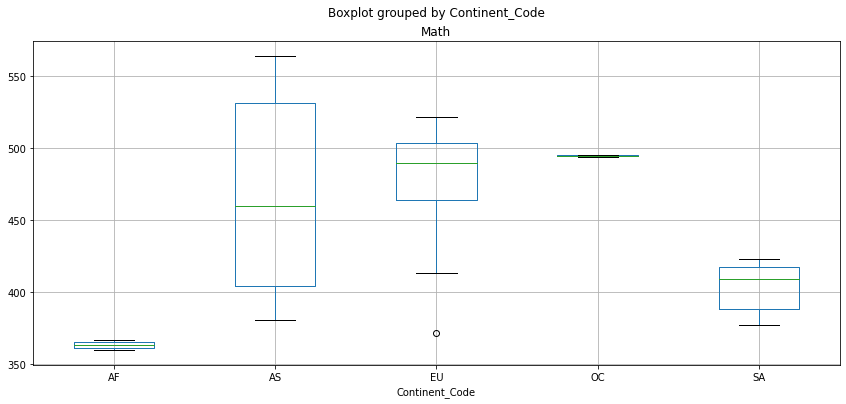

In [88]:
pisa.boxplot(  "Math", by = "Continent_Code",figsize=(14,6));

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

In [75]:
std=pd.read_csv("students_2014 - students_2014.csv")
std.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [76]:
std.English.fillna(std.English.mean(),inplace=True)
#std.English.dropna(inplace=True)

In [78]:
std.Math.fillna(std.Math.mean(),inplace=True)
#std.Math.dropna(inplace=True)

In [79]:
stats.pearsonr(std.Math,std.English)

(0.2353659898581759, 6.879360316892704e-07)

In [81]:
stats.ttest_rel(std.English,std.Math, axis=0, alternative='two-sided')

Ttest_relResult(statistic=38.888539303774564, pvalue=1.6341735302761681e-143)